# Prefiltrado

Extracting parameters from sub-S001_ses-01_task-MatrixCalibration_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 276082  =      0.000 ...   920.273 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 9901 samples (33.003 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window wit

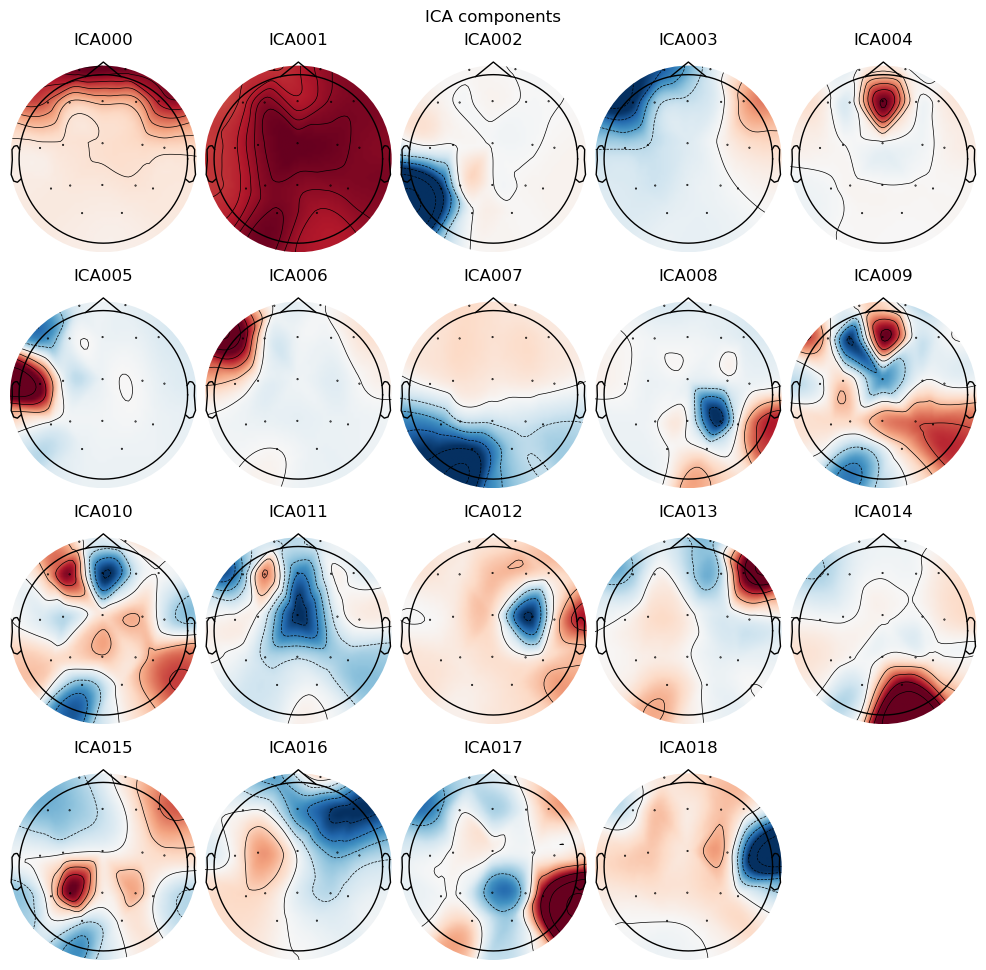

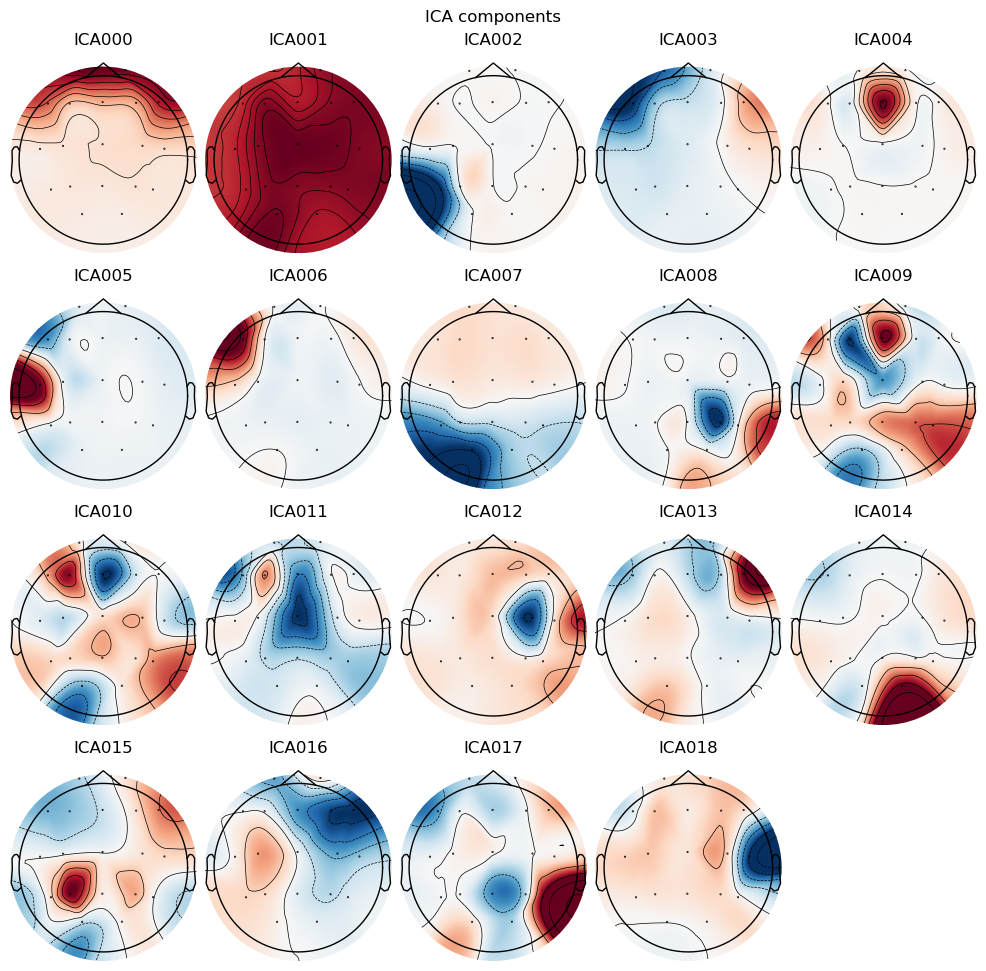

Channels marked as bad:
none


In [1]:
import mne

raw = mne.io.read_raw_brainvision(
    "sub-S001_ses-01_task-MatrixCalibration_run-01_eeg.vhdr",
    preload=True
)

raw.filter(l_freq=0.1, h_freq=30)

raw.notch_filter(freqs=50)

raw.plot(duration=10, n_channels=32)

montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage)
ica = mne.preprocessing.ICA(n_components=19, random_state=42)
ica.fit(raw)
ica.plot_sources(raw)
ica.plot_components()
